In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()

Loading the dataset into a variable

In [2]:
ckd= pd.read_csv('kidney_disease_complete_2b.csv')

In [3]:
print(ckd)

ckd.describe()

      id  age  bp     sg  al  su     rbc        pc         pcc          ba  \
0      0   48  80  1.020   1   0  normal    normal  notpresent  notpresent   
1      2   62  80  1.010   2   3  normal    normal  notpresent  notpresent   
2      3   48  70  1.005   4   0  normal  abnormal     present  notpresent   
3      4   51  80  1.010   2   0  normal    normal  notpresent  notpresent   
4      5   60  90  1.015   3   0  normal    normal  notpresent  notpresent   
..   ...  ...  ..    ...  ..  ..     ...       ...         ...         ...   
375  393   43  60  1.025   0   0  normal    normal  notpresent  notpresent   
376  394   50  80  1.020   0   0  normal    normal  notpresent  notpresent   
377  395   55  80  1.020   0   0  normal    normal  notpresent  notpresent   
378  396   42  70  1.025   0   0  normal    normal  notpresent  notpresent   
379  399   58  80  1.025   0   0  normal    normal  notpresent  notpresent   

     ...  pcv    wc   rc  htn   dm  cad  appet   pe  ane classi

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,200.207895,53.623684,76.947368,1.017750,0.989474,0.407895,147.105263,58.122895,2.905921,137.601316,4.641579,12.515789,38.336842,9302.626316,4.667368
std,115.970342,14.455389,13.479090,0.005436,1.251867,1.054925,76.353673,50.124305,4.368054,9.429064,2.889186,2.748012,9.073270,3775.688281,1.053672
min,0.000000,12.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.000000
25%,98.750000,45.000000,70.000000,1.015000,0.000000,0.000000,102.000000,28.750000,1.000000,135.000000,4.000000,10.800000,32.000000,6699.500000,3.900000
50%,203.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.600000,12.500000,40.000000,8700.000000,4.800000
75%,301.250000,65.000000,80.000000,1.020000,2.000000,0.000000,156.250000,66.000000,2.800000,141.000000,4.800000,14.725000,45.000000,10825.000000,5.500000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,48.100000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [4]:
ckd.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [5]:
ckd.shape

(380, 26)

CHECKING THE DISTRIBUTION OF CLASSIFICATION VARIABLES

In [6]:
ckd['classification'].value_counts()

classification
ckd       232
notckd    146
ckd\t       2
Name: count, dtype: int64

In [7]:
#ckd -> Defective kidney
#notckd -> Healthy kidney

ERROR CORRECTION

In [8]:
ckd["classification"]=ckd["classification"].apply(lambda x: 'ckd' if x=='ckd\t' else x)

ckd['dm']=ckd["dm"].apply(lambda x: 'no' if x=="\tno" else x)
ckd["dm"]=ckd["dm"].apply(lambda x: 'yes' if x=="\tyes" else x)
ckd["dm"]=ckd["dm"].apply(lambda x: 'yes' if x==" yes" else x)

ckd["cad"]=ckd["cad"].apply(lambda x: 'no' if x=="\tno" else x)
ckd["cad"]=ckd["cad"].apply(lambda x: 'yes' if x=="\tyes" else x)

CHECKING CHANGES AFTER ERROR CORRECTION

In [9]:
for i in ckd.columns:
  print(set(ckd[i].tolist()))
  print()

{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,

In [10]:
ckd['classification'].value_counts()

classification
ckd       234
notckd    146
Name: count, dtype: int64

In [11]:
ckd['dm'].value_counts()

dm
no     245
yes    135
Name: count, dtype: int64

In [12]:
ckd['cad'].value_counts()

cad
no     346
yes     34
Name: count, dtype: int64

CHECKING FOR IMBALANCES

Axes(0.125,0.11;0.775x0.77)


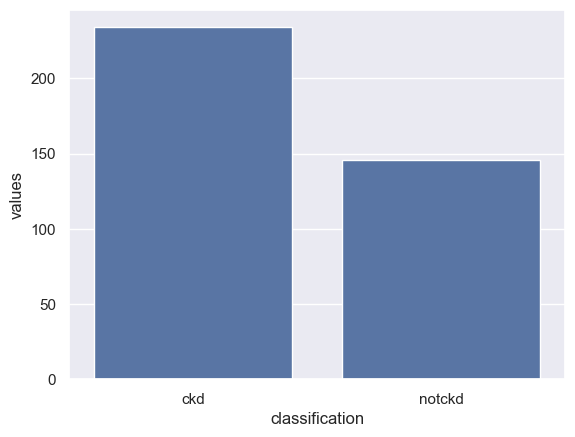

In [13]:
temp=ckd["classification"].value_counts()
temp_ckd=pd.DataFrame({"classification": temp.index, 'values': temp.values})
print(sns.barplot(x='classification',y="values", data=temp_ckd))

FIXING DATA TYPE ERRORS

In [14]:
ckd.dtypes

id                  int64
age                 int64
bp                  int64
sg                float64
al                  int64
su                  int64
rbc                object
pc                 object
pcc                object
ba                 object
bgr                 int64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [15]:
ckd.select_dtypes(exclude=["object"]).columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')

CHANGING ALL INTEGER VALUES TO FLOAT

In [16]:
for i in ckd.select_dtypes(exclude=["object"]).columns:
  ckd[i]=ckd[i].apply(lambda x: float(x))

In [17]:
ckd.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

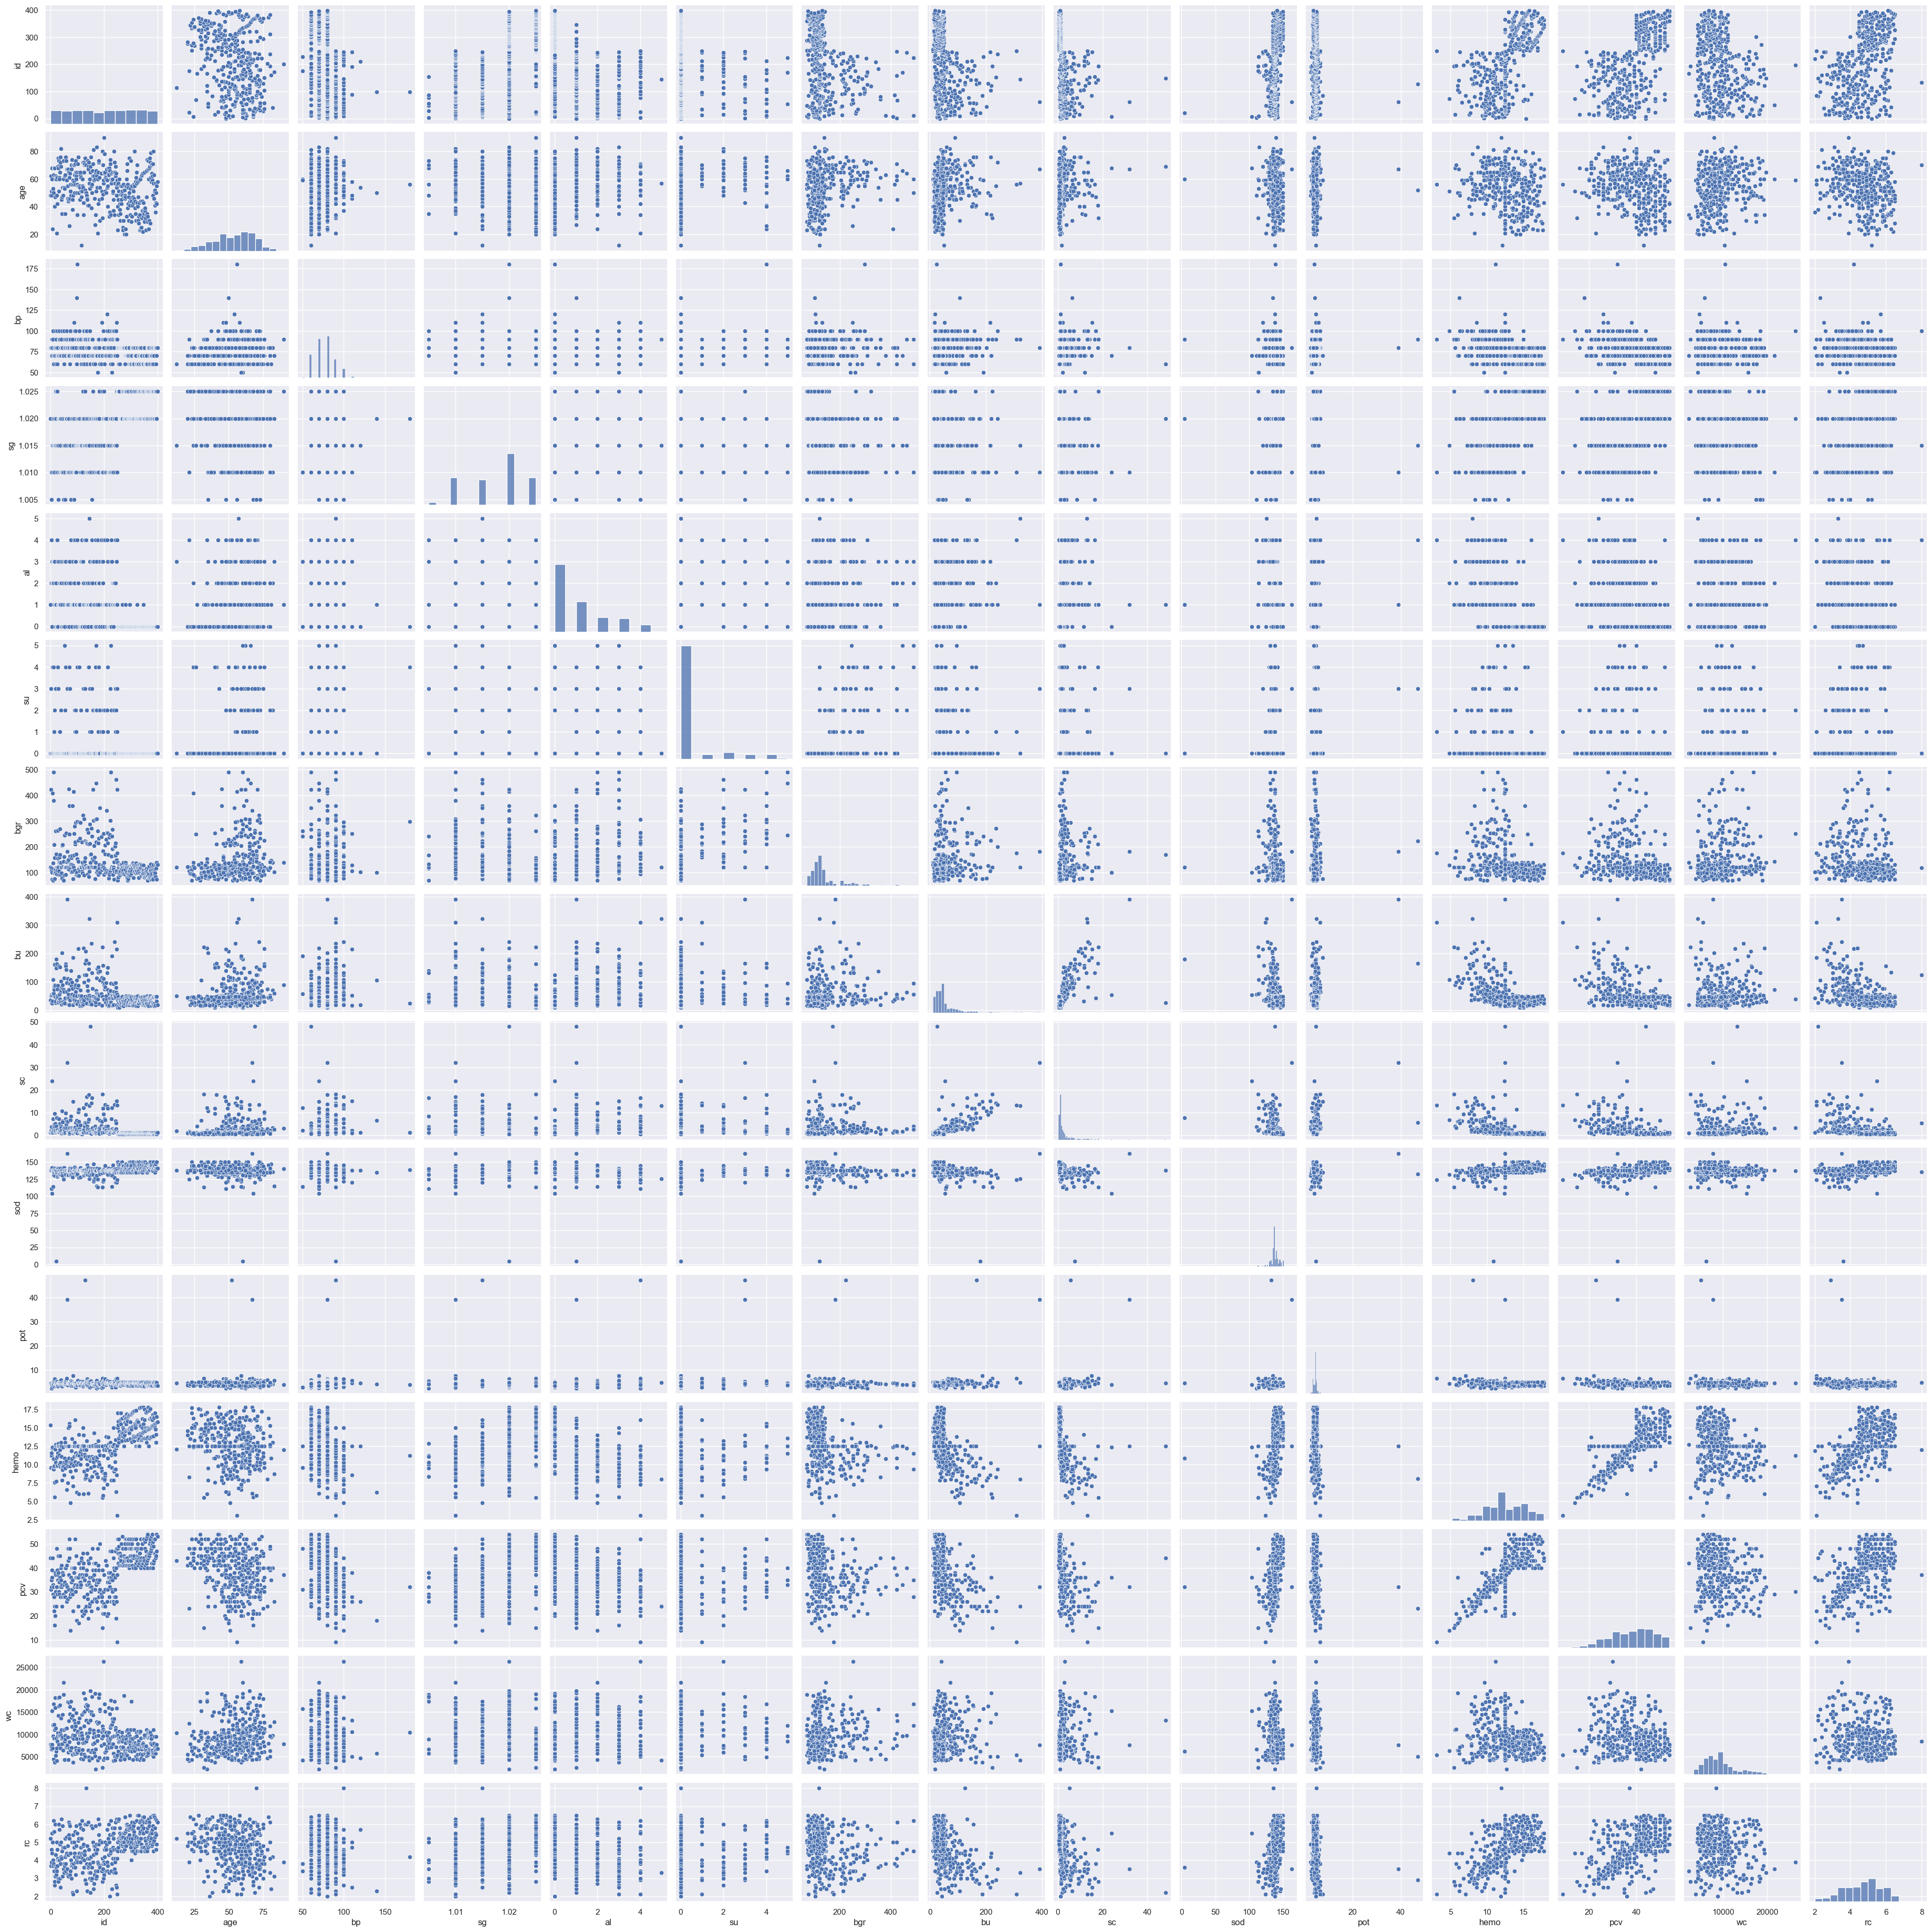

In [18]:
sns.pairplot(ckd)

FINDING THE DISTRIBUTION

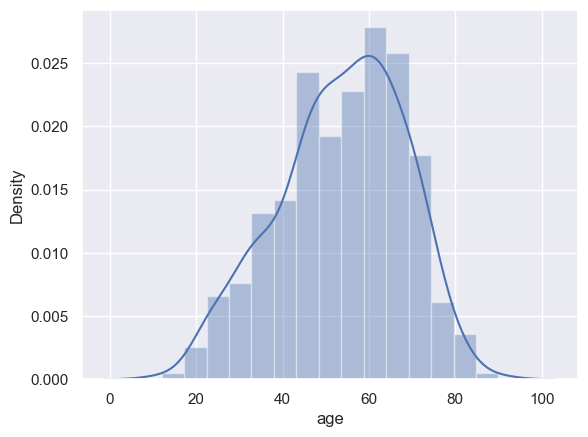

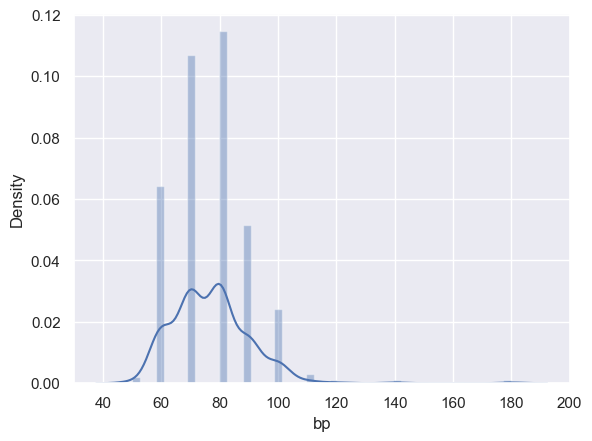

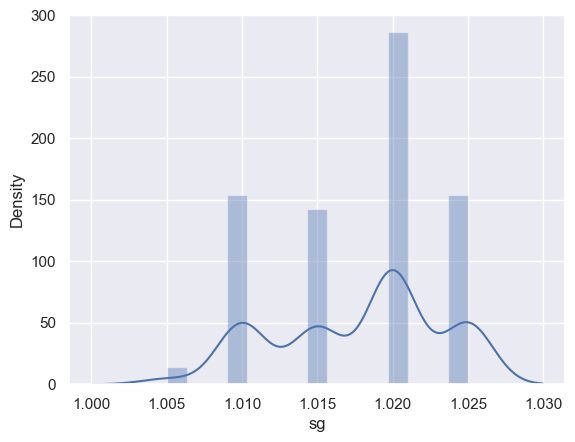

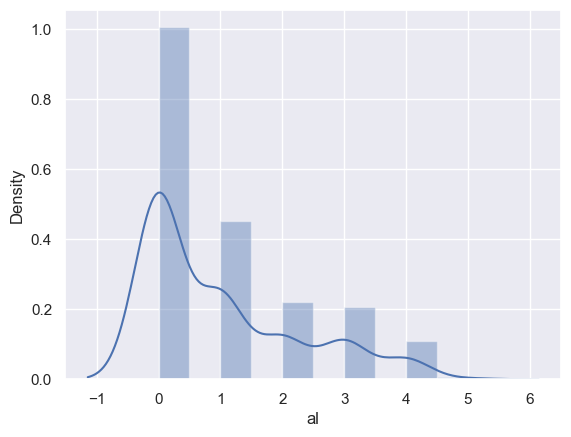

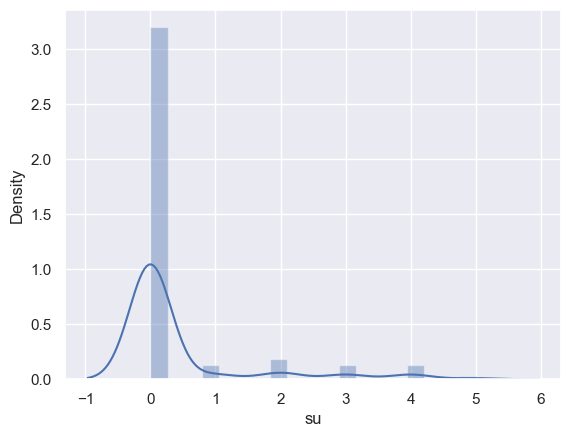

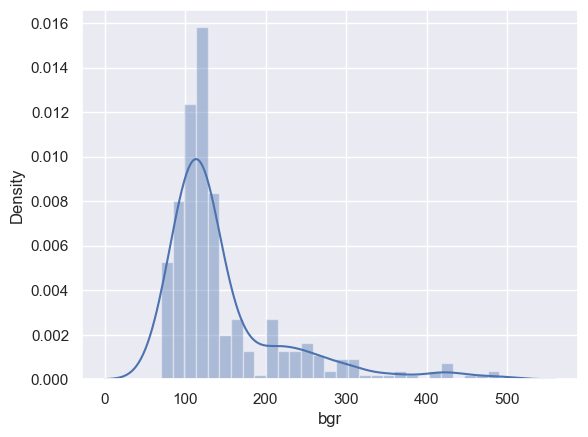

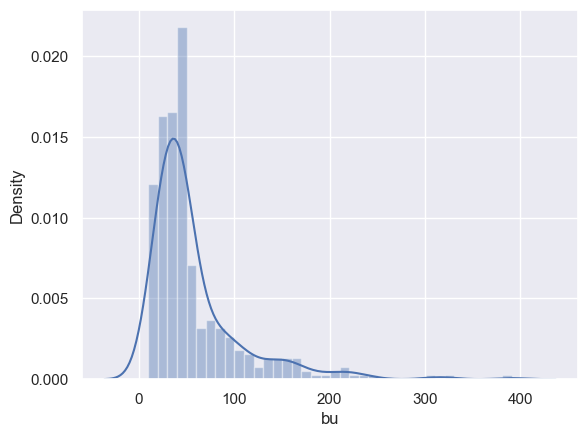

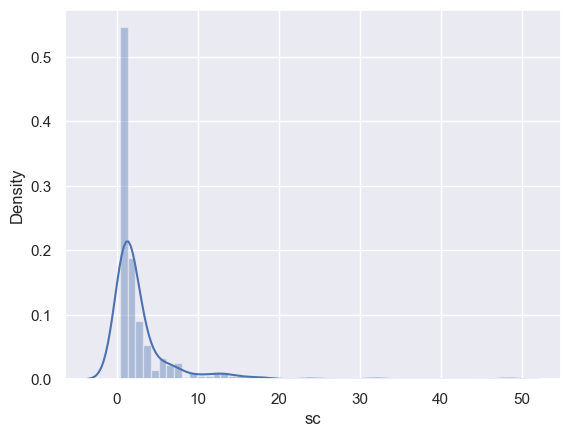

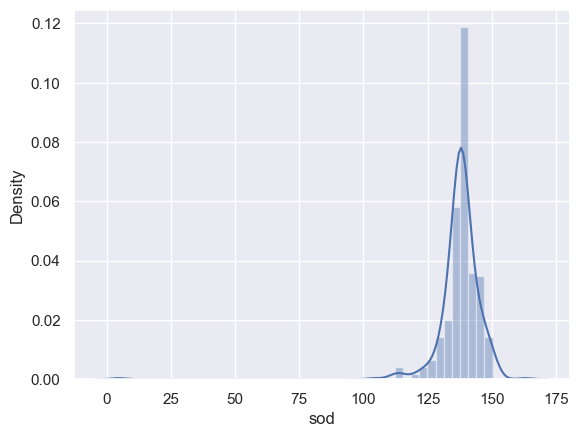

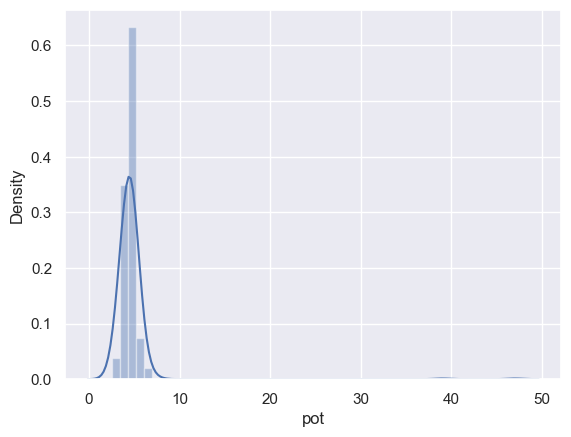

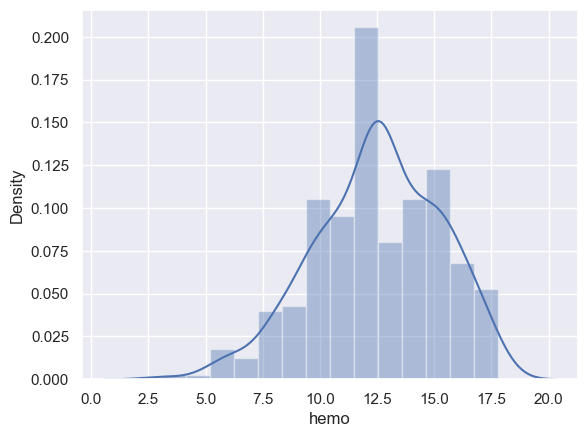

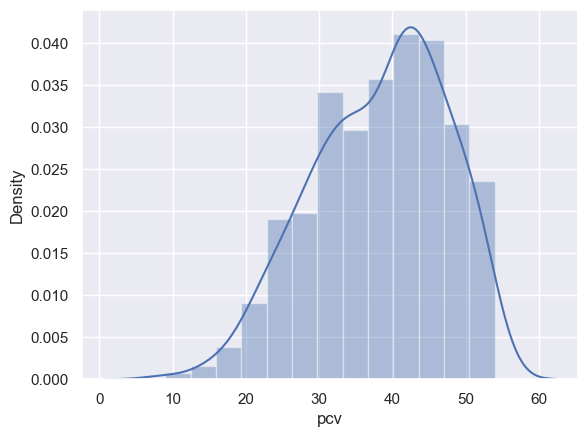

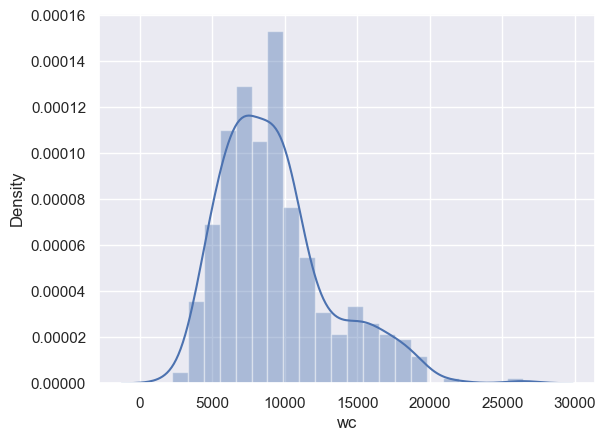

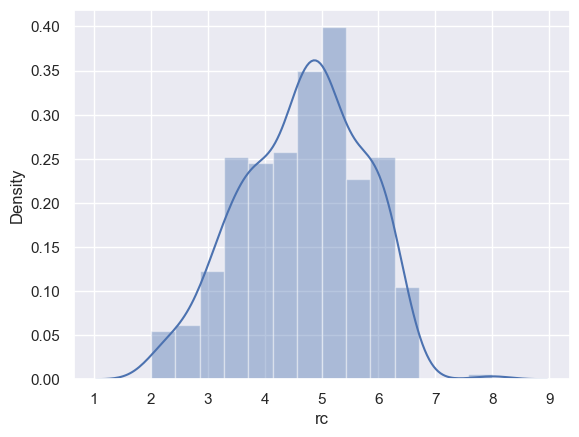

In [19]:
def distplots(col):
  sns.distplot(ckd[col])
  plt.show()

for i in list(ckd.select_dtypes(exclude=["object"]).columns)[1:]:
    distplots(i)

REMOVING OUTLIERS

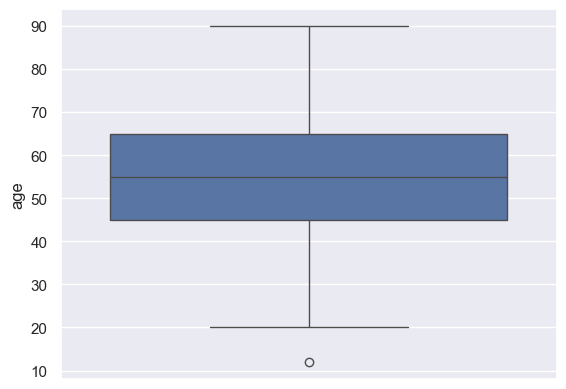

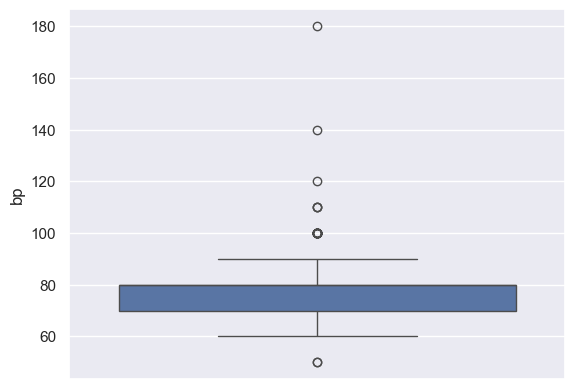

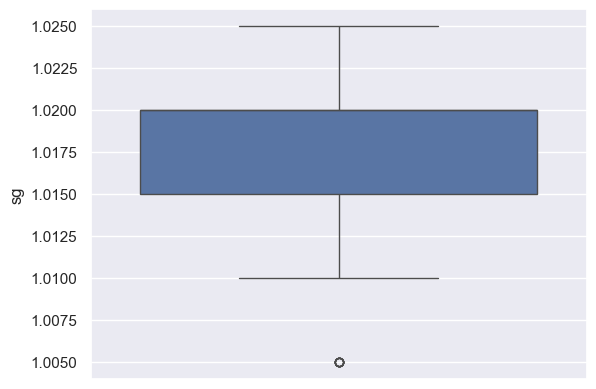

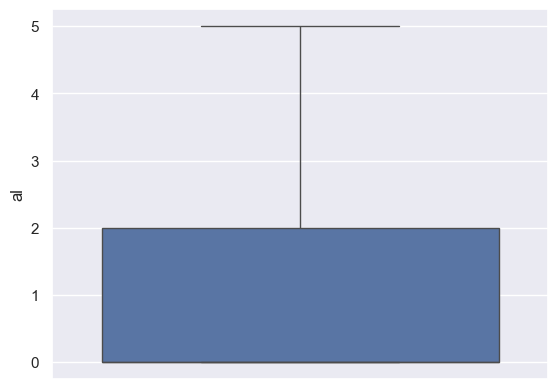

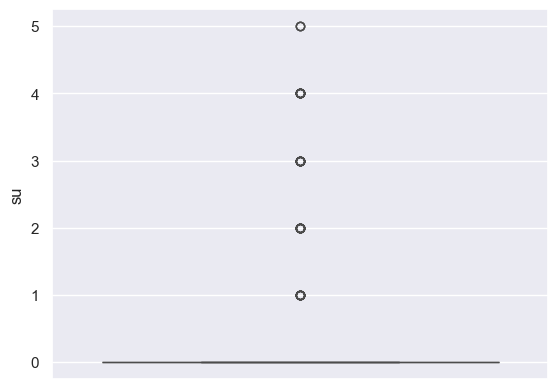

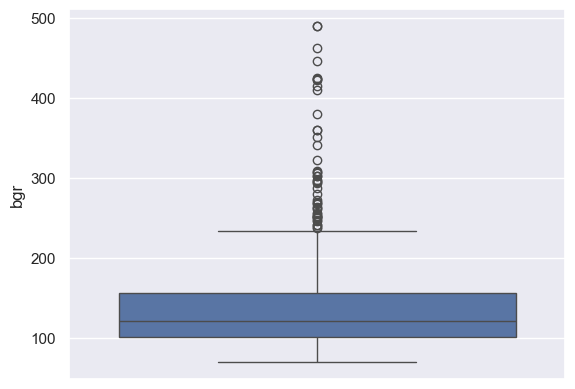

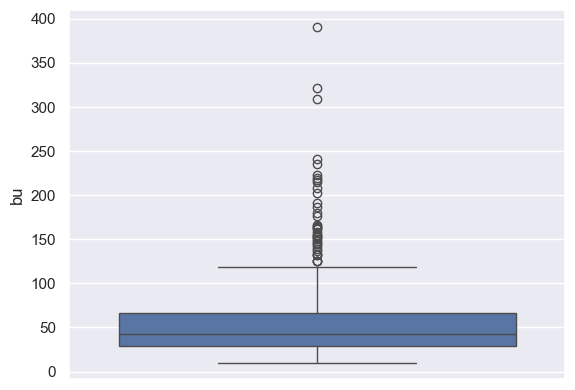

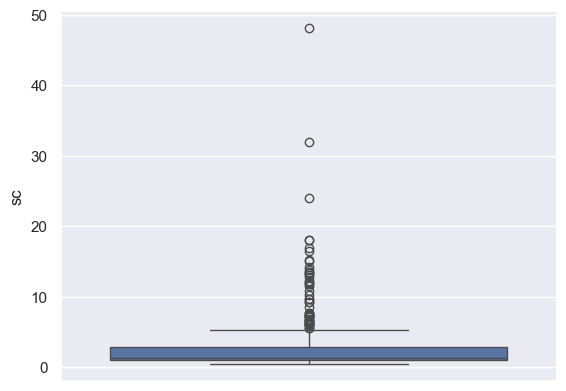

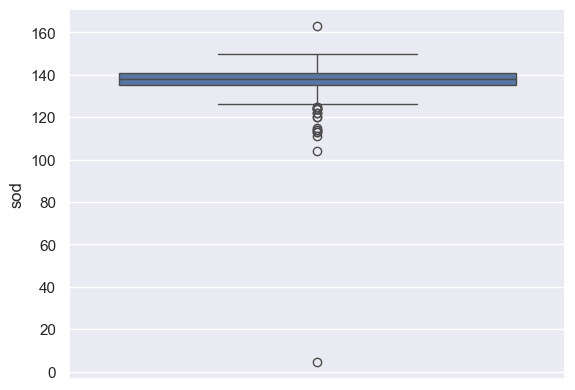

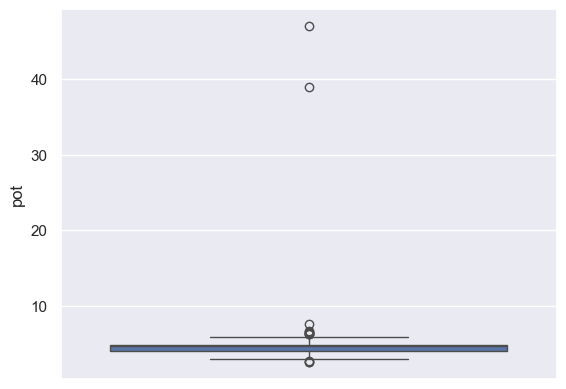

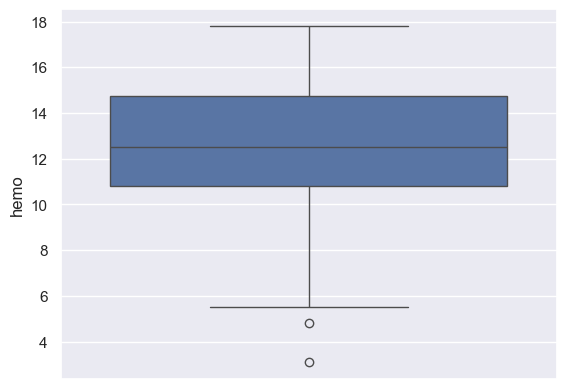

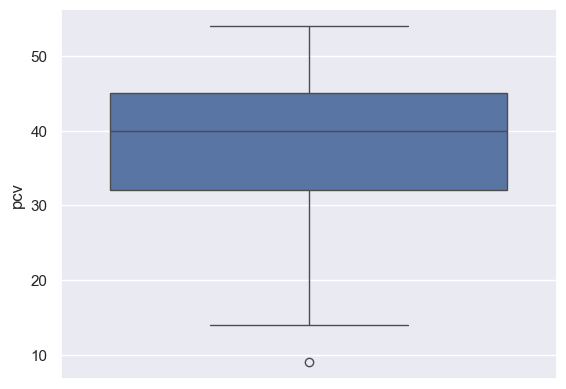

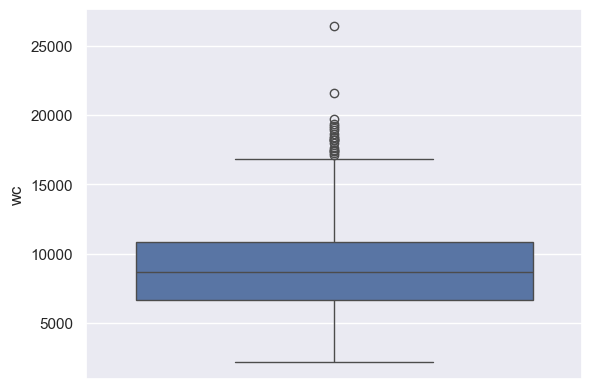

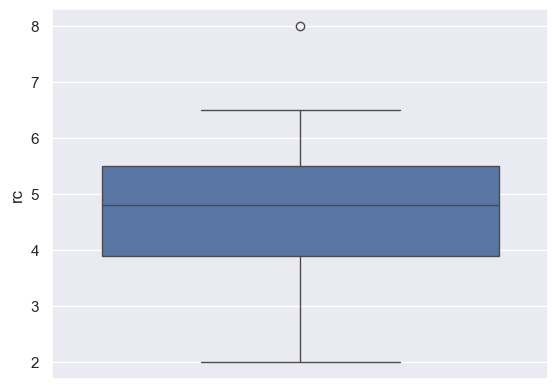

In [20]:
def boxplots(col):
  sns.boxplot(ckd[col])
  plt.show()

for i in list(ckd.select_dtypes(exclude=["object"]).columns)[1:]:
  boxplots(i)

CONVERTING CATEGORICAL VALUES TO NUMERICAL VALUES

In [21]:
from sklearn import preprocessing

ckd_enco=ckd.apply(preprocessing.LabelEncoder().fit_transform)
ckd_enco

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,28,3,3,1,0,1,1,0,0,...,31,61,32,1,1,0,0,0,0,0
1,1,42,3,1,2,3,1,1,0,0,...,18,58,17,0,1,0,1,0,1,0
2,2,28,2,0,4,0,1,0,1,0,...,19,47,19,1,0,0,1,1,1,0
3,3,31,3,1,2,0,1,1,0,0,...,22,54,26,0,0,0,0,0,0,0
4,4,40,4,2,3,0,1,1,0,0,...,26,61,24,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,23,1,4,0,0,1,1,0,0,...,41,57,34,0,0,0,0,0,0,1
376,376,30,3,3,0,0,1,1,0,0,...,32,87,26,0,0,0,0,0,0,1
377,377,35,3,3,0,0,1,1,0,0,...,34,47,29,0,0,0,0,0,0,1
378,378,22,2,4,0,0,1,1,0,0,...,41,61,42,0,0,0,0,0,0,1


In [22]:
ckd_enco.to_csv("Kidney_Disease_Pre-Processed.csv")

FINDING CORRELATION

<Axes: >

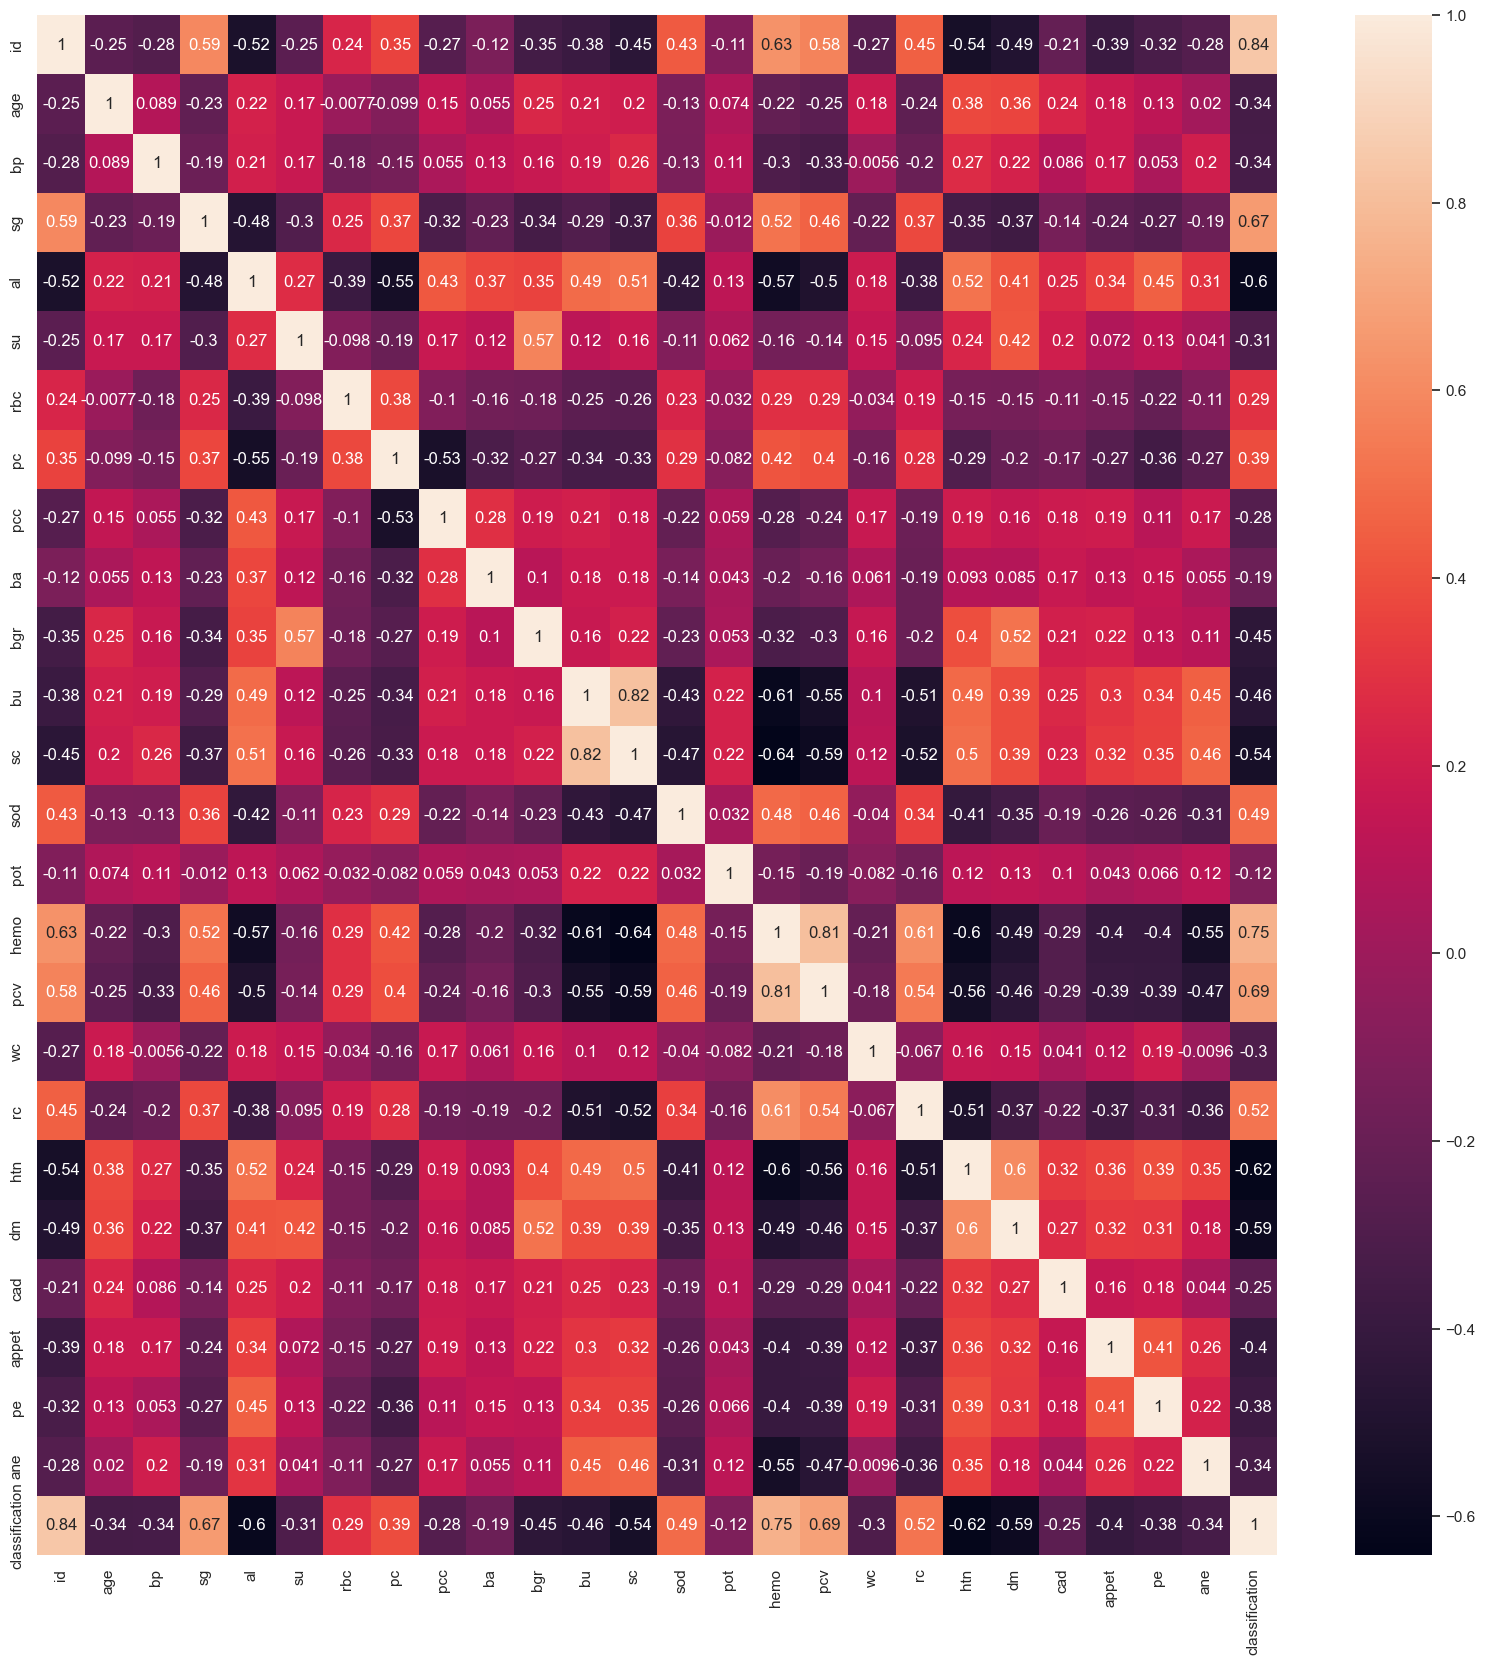

In [23]:
plt.figure(figsize=(20,20))
corr=ckd_enco.corr()
sns.heatmap(corr, annot=True)

FEATURE ENGINEERING

In [24]:
#separating independent and dependent variables and dropping the id column

x=ckd_enco.drop(["id", "classification"],axis=1)
y=ckd_enco["classification"]

DETECTING LABEL BALANCE

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({0: 234, 1: 146})


In [26]:
#balancing the labels

ros= RandomOverSampler()

X_ros, y_ros = ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({0: 234, 1: 234})


NORMALIZING DATA

In [27]:
#Initialize a MinMaxScalar and scale the features to between -1 and 1 to normalize them.
#MinMaxScaler transforms features by scaling them to a given range.
#The fit_transform() method fits to the data and then transforms it. We don't need to scales the labels.
#Scale the features to between -1 and 1

#Scaling is important in the algorithms such as support vector machines(SVM) and k-nearest neighbors(KNN) where distance
#between the data points is important.

scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros

PRINCIPAL COMPONENT ANALYSIS (PCA)

In [28]:
#used for dimensionality reduction and data visualization.
#The code below has .95 for the number of components parameter.
#It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCA=pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

#we need 18 columns to keep a variance of 95%

(468, 24)
(468, 18)


In [29]:
#With PCA

#Split the dataset into training and testing sets keeping 20% of the data for testing.
#Split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_PCA,y, test_size=0.2, random_state=7)

DEEP LEARNING MODEL DEVELOPMENT

In [30]:
import keras
#A sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential, Model
from keras.optimizers import Adam
from sklearn.model_selection import KFold

In [31]:
def model():
  
  classifier = Sequential()
  classifier.add(Dense(15, input_shape=(x_train.shape[1],),activation='relu'))
  classifier.add(Dropout(0.2))
  classifier.add(Dense(15,activation='relu'))
  classifier.add(Dropout(0.4))
  classifier.add(Dense(1, activation = 'sigmoid'))
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics =['accuracy'])

  return classifier

In [32]:
x_train.shape[1]

18

In [33]:
model = model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           285 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history =model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs =10,batch_size=15, verbose= 1)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5586 - loss: 0.7529 - val_accuracy: 0.8191 - val_loss: 0.6140
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7118 - loss: 0.6400 - val_accuracy: 0.9043 - val_loss: 0.5597
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7336 - loss: 0.5700 - val_accuracy: 0.9574 - val_loss: 0.5032
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8571 - loss: 0.5011 - val_accuracy: 0.9681 - val_loss: 0.4430
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8649 - loss: 0.4528 - val_accuracy: 0.9681 - val_loss: 0.3819
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8984 - loss: 0.3819 - val_accuracy: 0.9681 - val_loss: 0.3242
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9357 - loss: 0.3307 - val_accuracy: 0.9681 - val_loss: 0.2709
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9097 - loss: 0.3011 - val_accuracy: 0.9681 - val_loss

MODEL LOSS AND ACCURACY VALUES

In [35]:
loss,accuracy=model.evaluate(x_test,y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9776 - loss: 0.1673 
Loss: 0.1611015796661377
Accuracy: 0.978723406791687


In [36]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score,precision_recall_fscore_support, f1_score, confusion_matrix

#function to plot the roc_curve
def plot_auc(t_y,p_y):
  fpr,tpr, thresholds = roc_curve(t_y, p_y,pos_label=1)
  fig, c_ax = plt.subplots(1,1, figsize = (8,6))
  c_ax.plot(fpr,tpr,label = '%s [AUC:%0.2f]' % ('classification', auc(fpr,tpr)))
  c_ax.plot([0,1],[0,1], color='navy', lw=1, linestyle='--')
  c_ax.legend()
  c_ax.set_xlabel('False Positive Rate')
  c_ax.set_ylabel('True Positive Rate')

  #function to plot the precision_recall_curve
def plot_precision_recall_curve_helper(t_y,p_y):
    fig, c_ax= plt.subplots(1,1, figsize =(8,6))
    precision,recall,thresholds =precision_recall_curve(t_y,p_y,pos_label=1)
    aps=average_precision_score(t_y,p_y)
    c_ax.plot(recall,precision,label='%s (AP Score:%0.2f)' % ('classification',aps))
    c_ax.plot(recall,precision, color='red', lw=2)
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')

    #function to plot the history
def plot_history(history):
      f= plt.figure()
      f.set_figwidth(15)


      f.add_subplot(1, 2, 1)
      plt.plot(history.history['val_loss'],label='val loss')
      plt.plot(history.history['loss'],label='train loss')
      plt.legend()
      plt.title("MODEL LOSS")

      f.add_subplot(1, 2, 2)
      plt.plot(history.history['val_accuracy'],label='val accuracy')
      plt.plot(history.history['accuracy'],label='train accuracy')
      plt.legend()
      plt.title("MODEL ACCURACY")

      plt.show()

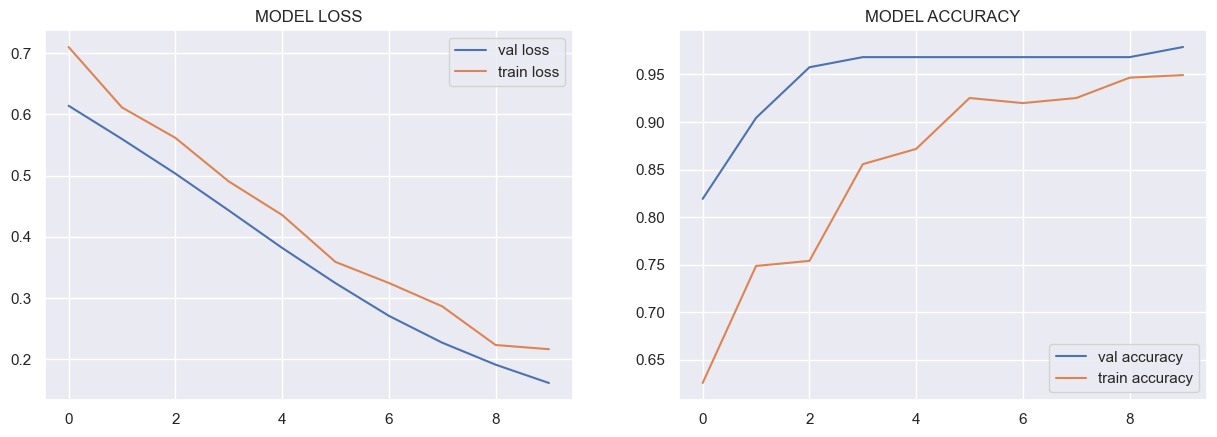

In [37]:
hist=plot_history(history)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


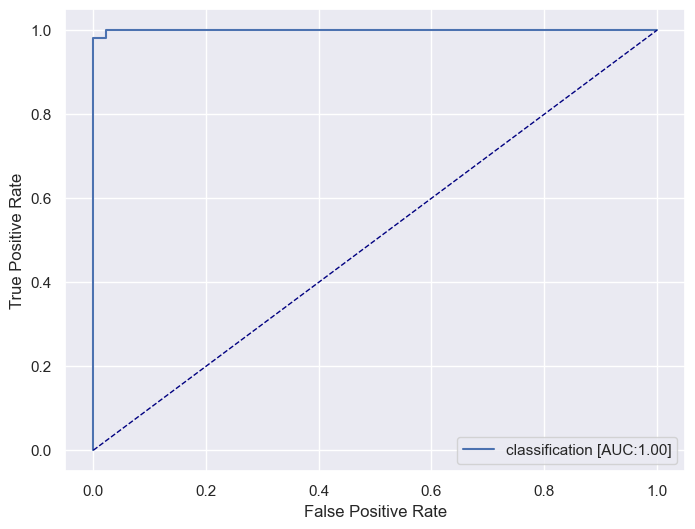

In [38]:
plot_auc(y_test, model.predict(x_test, verbose =True))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


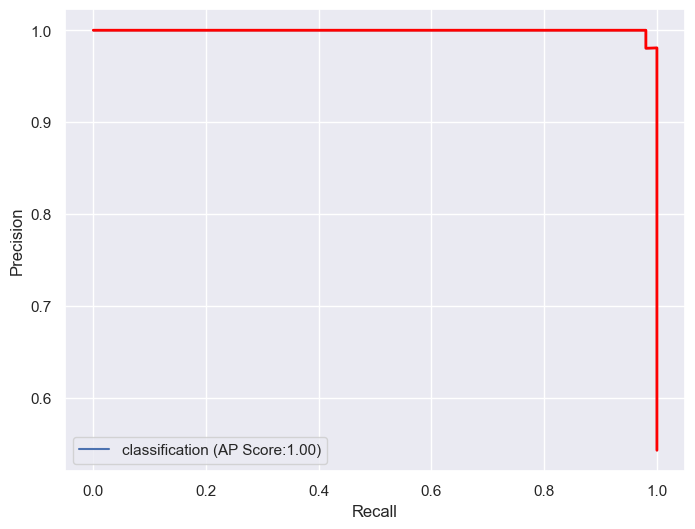

In [39]:
plot_precision_recall_curve_helper(y_test,model.predict(x_test,verbose =True))

MODEL OPTIMIZATION

In [40]:
#Find the threshold that optimize your model's performance,
#and use that threshold to make binary classification.

def calc_f1(prec,recall):
  return 2*(prec*recall)/(prec+recall) if recall and prec else 0

precision, recall, thresholds=precision_recall_curve(y_test,model.predict(x_test,verbose =True))
f1score =[calc_f1(precision[i], recall[i]) for i in range(len(thresholds))]
idx=np.argmax(f1score)
threshold=thresholds[idx]
loss,accuracy=model.evaluate(x_test,y_test)
print('----------------------------------------------')
print('Precision: '+ str(precision[idx]))
print("Accuracy:", accuracy)
print("Loss:", loss)
print('Recall: '+ str(recall[idx]))
print('Threshold: '+ str(thresholds[idx]))
print('F1 Score: '+ str(f1score[idx]))





3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9776 - loss: 0.1673 
----------------------------------------------
Precision: 0.9807692307692307
Accuracy: 0.978723406791687
Loss: 0.1611015796661377
Recall: 1.0
Threshold: 0.69740117
F1 Score: 0.9902912621359222


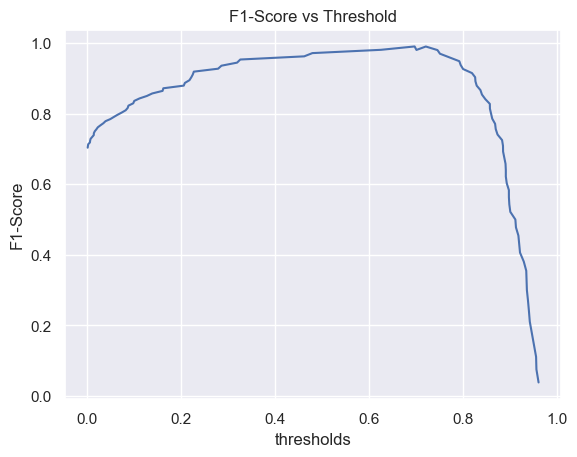

In [41]:
#the threshold or cut_off represents in a binary classification the probability
#that the prediction is true.

plt.figure()
plt.plot(thresholds,f1score)
plt.title("F1-Score vs Threshold")
plt.xlabel("thresholds")
plt.ylabel("F1-Score")
plt.show()

PREDICTION AND INTERPRETATION

In [50]:
def predict_new_data(new_data_array):
    # Perform PCA
    new_data_pca = pca.transform([new_data_array])  # Ensure that new_data_array is wrapped in a list
    
    # Make predictions
    predictions = model.predict(new_data_pca)
   
    
    return predictions

def status(prediction):
    if prediction == 1:
        return "The patient could be suffering from Chronic Kidney Disease"
       
        
    else:
         return "The patient is not suffering from Chronic Kidney Disease)"

# Example usage:
if __name__ == "__main__":#
    #new_data_array = [50, 80, 1.025, 0, 0, 0, 1, 0, 1, 150, 80, 4.0, 140, 5.0, 10.0, 35, 12000, 4.0, 1, 1, 1, 1, 1, 1]
    #new_data_array = [40, 80, 1.020, 0, 0, 0, 0, 0, 0, 100, 50, 1.1, 140, 4.0, 15.0, 40, 7000, 4.8, 0, 0, 0, 0, 0, 0]
    #new_data_array = [65, 140, 1.020, 3, 2, 1, 1, 1, 1, 160, 80, 2.5, 150, 5.0, 10.0, 35, 9000, 3.8, 1, 1, 1, 1, 1, 1]
    new_data_array = [25, 90, 1.012, 4, 1, 0, 1, 0, 1, 100, 49, 5.9, 108, 2.3, 8.5, 32, 10461, 2.8, 1, 0, 1, 0, 1, 0]


predictions = predict_new_data(new_data_array)

# Interpret the prediction
for prediction in predictions:
    interpretation = status(prediction)
    print("Prediction:", prediction)
    print("Interpretation:", interpretation)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: [0.]
Interpretation: The patient is not suffering from Chronic Kidney Disease)
